<a href="https://colab.research.google.com/github/Scotti001/Scotti001/blob/master/SparceAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow scikit-learn

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.4079 - val_loss: 1.3440
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5397 - val_loss: 1.3360
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3826 - val_loss: 1.3281
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3765 - val_loss: 1.3202
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5249 - val_loss: 1.3124
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4041 - val_loss: 1.3049
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3808 - val_loss: 1.2978
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4146 - val_loss: 1.2904
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4388 - val_loss: 1.2832
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3591 - val_loss: 1.2763
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3077 - val_loss: 1.2695
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4727 - val_loss: 1.2626

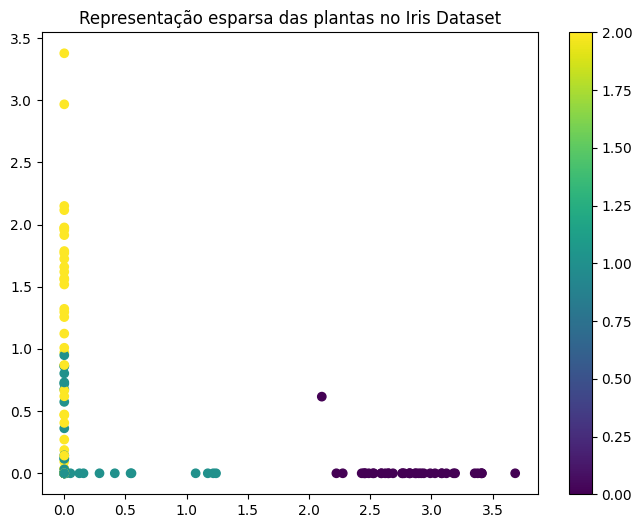

In [4]:
# Passo 1: Instalar as bibliotecas necessárias (caso não estejam instaladas)
# No Colab, essas bibliotecas já vêm instaladas por padrão, mas para garantir:
!pip install tensorflow scikit-learn

# Passo 2: Importar bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Passo 3: Carregar o Iris Dataset do Scikit-learn
iris = datasets.load_iris()
X = iris.data  # Características (sépalas e pétalas)
y = iris.target  # Rótulos (classes)

# Passo 4: Padronizar os dados (muito importante para redes neurais)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Passo 5: Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Passo 6: Definir o modelo Sparse Autoencoder (SAE)
def build_sae(input_dim, encoding_dim):
    # Encoder
    input_data = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_data)

    # Decoder
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Autoencoder completo
    autoencoder = Model(inputs=input_data, outputs=decoded)

    # Encoder separado
    encoder = Model(inputs=input_data, outputs=encoded)

    # Compilar o modelo com uma função de perda apropriada
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder, encoder

# Definir as dimensões de entrada e codificação (pode ajustar a codificação como necessário)
input_dim = X_train.shape[1]
encoding_dim = 2  # Reduzir as características para 2 dimensões (esparsidade)

# Criar o SAE
autoencoder, encoder = build_sae(input_dim, encoding_dim)

# Passo 7: Treinar o SAE
autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Passo 8: Codificar os dados de entrada
encoded_train = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# Passo 9: Visualizar as representações esparsas
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(encoded_train[:, 0], encoded_train[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("Representação esparsa das plantas no Iris Dataset")
plt.show()


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [18]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


# Carregar o CSV no pandas DataFrame
df = pd.read_csv('Iris.csv')

# Exibir as primeiras linhas para verificar se o arquivo foi carregado corretamente
print(df.head())

# Remover a coluna 'Id' (se existir) e separar as características (X)
# Substitua o nome das colunas, se necessário
X = df.drop(columns=['Species'], axis=1)  # Excluir a coluna de rótulos 'Species' (não supervisionado)

# Padronizar os dados para melhorar o treinamento do modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [69]:
# Função para criar o modelo SAE

def build_sae(input_dim, encoding_dim):
   # Adicionando mais camadas
    encoded = Dense(64, activation='relu')(input_data)
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='linear')(decoded)


    # Autoencoder completo
    autoencoder = Model(inputs=input_data, outputs=decoded)

    # Encoder separado (somente para obter a codificação)
    encoder = Model(inputs=input_data, outputs=encoded)

    # Compilar o modelo
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder, encoder

# Definir as dimensões de entrada e codificação
input_dim = X_scaled.shape[1]  # Número de características
encoding_dim = 4  # Definimos 3 dimensões para a codificação esparsa

# Criar o SAE
autoencoder, encoder = build_sae(input_dim, encoding_dim)

# Treinar o SAE
autoencoder.fit(X_scaled, X_scaled, epochs=200, batch_size=16, shuffle=True, validation_split=0.2)



Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.9266 - val_loss: 1.0218
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.8814 - val_loss: 1.0231
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.7510 - val_loss: 1.0096
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.6260 - val_loss: 0.9788
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.4847 - val_loss: 0.9157
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.4632 - val_loss: 0.8082
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.3427 - val_loss: 0.6589
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.2393 - val_loss: 0.4913
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1844 - val_loss: 0.3337
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1452 - val_loss: 0.2195
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1070 - val_loss: 0.1547
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0813 - val_loss: 0.1245


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


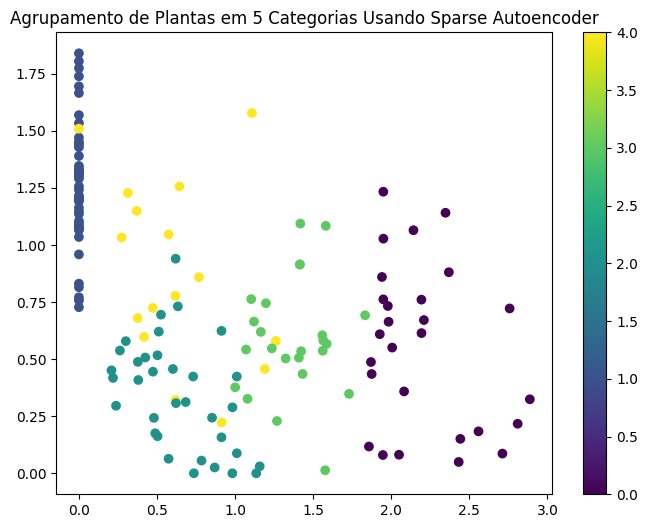

In [74]:
# Obter as representações esparsas (codificações) dos dados de treino
encoded_data = encoder.predict(X_scaled)

# Passo 4: Agrupamento usando K-means em 5 categorias
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(encoded_data)

# Obter os rótulos (categorias) que o K-means encontrou
labels = kmeans.labels_

# Adicionar as categorias encontradas ao dataframe original
df['Cluster'] = labels

# Exibir as primeiras linhas do dataframe com os clusters
print(df.head())

# Passo 5: Visualizar as categorias encontradas (com base na codificação de 3 dimensões)
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('Agrupamento de Plantas em 5 Categorias Usando Sparse Autoencoder')
plt.show()


In [72]:
from sklearn.metrics import mean_squared_error

# Reconstruir os dados usando o autoencoder
reconstructed_data = autoencoder.predict(X_scaled)

# Calcular o erro de reconstrução (MSE)
mse = mean_squared_error(X_scaled, reconstructed_data)
print(f'Erro de Reconstrução (MSE): {mse:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Erro de Reconstrução (MSE): 0.0043


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [73]:
import pandas as pd

# Comparar os dados originais com os dados reconstruídos
original_vs_reconstructed = pd.DataFrame({
    'SepalLength_Original': X_scaled[:, 0],
    'SepalLength_Reconstructed': reconstructed_data[:, 0],
    'SepalWidth_Original': X_scaled[:, 1],
    'SepalWidth_Reconstructed': reconstructed_data[:, 1],
    'PetalLength_Original': X_scaled[:, 2],
    'PetalLength_Reconstructed': reconstructed_data[:, 2],
    'PetalWidth_Original': X_scaled[:, 3],
    'PetalWidth_Reconstructed': reconstructed_data[:, 3],
})

# Exibir as primeiras linhas da comparação
print(original_vs_reconstructed.head())


   SepalLength_Original  SepalLength_Reconstructed  SepalWidth_Original  \
0             -0.900681                  -0.909408             1.019004   
1             -1.143017                  -1.155184            -0.131979   
2             -1.385353                  -1.380002             0.328414   
3             -1.506521                  -1.491494             0.098217   
4             -1.021849                  -1.031299             1.249201   

   SepalWidth_Reconstructed  PetalLength_Original  PetalLength_Reconstructed  \
0                  0.998125             -1.340227                  -1.338228   
1                 -0.115681             -1.340227                  -1.311889   
2                  0.309421             -1.397064                  -1.358750   
3                  0.072607             -1.283389                  -1.324974   
4                  1.225020             -1.340227                  -1.349175   

   PetalWidth_Original  PetalWidth_Reconstructed  
0            -1.3